# **Frequência e Medidas - Aula de exercícios**

In [4]:
# importação de pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")

Os dados utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link: https://www.kaggle.com/sanjeetsinghnaik/top-1000-highest-grossing-movies


Primeiro, vamos ler os dados. 

Esse dataset contém informações sobre os 1000 filmes de Holywood com maior bilheteria.

Variáveis:
*   ***Title*** - título do filme
*   ***Movie Info*** - descrição do filme
*   ***Distributor*** - distribuidora do filme
*   ***Release Date*** - data de lançamento
*   ***Domestic Sales*** - quantidade de bilheteria vendida nacionalmente
*   ***International Sales*** - quantidade de bilheteria vendida internacionalmente
*   ***World Sales*** - quantidade de bilheteria vendida mundialmente
*   ***Genre*** - gênero do filme
*   ***Movie Runtime*** - duração do filme
*   ***License*** - licença do filme

Como os dados são arquivos em .csv vamos utilizar a função read_csv do pandas.


In [5]:
# lendo a base de dados
data = pd.read_csv("../dados/Highest Holywood Grossing Movies.csv")

## **Qual o seu tipo de dado?**

In [6]:
# verificando as primeiras colunas da base de dados
data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [7]:
# podemos ver que a coluna "Unnamed: 0" é desnecessária, então podemos excluí-la
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
# vamos verificar agora o nome das colunas que restaram
data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [9]:
# verificando a dimensão da base de dados
data.shape

(918, 10)

In [10]:
# verificando o tipo das colunas
data.dtypes

Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [11]:
# queremos mudar a coluna "Movie Runtime" para valores numéricos de hora 
runtime = data['Movie Runtime'].str.split(expand=True).iloc[:,[0,2]]
runtime[2].fillna(0, inplace=True)
runtime = runtime.astype('int64')
runtime['hour'] = runtime[0] + runtime[2]/60
data['Movie Runtime'] = runtime['hour']

In [12]:
# verificando o resultado
data['Movie Runtime']

0      2.300000
1      3.016667
2      2.700000
3      2.233333
4      2.483333
         ...   
913    2.050000
914    1.366667
915    2.216667
916    1.633333
917    1.700000
Name: Movie Runtime, Length: 918, dtype: float64

In [13]:
# queremos mudar o tipo da variável Release Date para Datetime
data['Release Date'] = pd.to_datetime( data['Release Date'])

In [14]:
# queremos transformar o valor arrecadado pra milhões de dólares, com o intuito de uma melhor visualização dos valores
data[['Domestic Sales (in $)','International Sales (in $)','World Sales (in $)']]= data[['Domestic Sales (in $)',
                                            'International Sales (in $)','World Sales (in $)']].apply(lambda x: x/(10**6))

In [15]:
# vamos verificar somente essas colunas
data[['Domestic Sales (in $)','International Sales (in $)','World Sales (in $)']].head()

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
0,936.662225,1132.859475,2069.521700
1,858.373000,1939.128328,2797.501328
2,760.507625,2086.738578,2847.246203
3,700.426566,647.171407,1347.597973
4,678.815482,1369.544272,2048.359754


In [16]:
# verificando novamente o tipo das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Title                       918 non-null    object        
 1   Movie Info                  918 non-null    object        
 2   Distributor                 918 non-null    object        
 3   Release Date                800 non-null    datetime64[ns]
 4   Domestic Sales (in $)       918 non-null    float64       
 5   International Sales (in $)  918 non-null    float64       
 6   World Sales (in $)          918 non-null    float64       
 7   Genre                       918 non-null    object        
 8   Movie Runtime               918 non-null    float64       
 9   License                     744 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 71.8+ KB


As variáveis qualitativas na base de dados são: 'Title', 'Movie Info', 'Distributor', 'Genre', 'License'.



As variáveis quantitativas na base de dados são: 
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Movie Runtime'

## **Distribuição de frequência**

### **Variáveis Qualitativas**

Vamos verificar quantos filmes de cada distribuidora estão na base de dados.

In [17]:
# vamos fazer uma tabela de frequência
pd.crosstab(index = data["Distributor"], columns="count").sort_values('count', ascending = False)

col_0,count
Distributor,
Warner Bros.,158
Walt Disney Studios Motion Pictures,155
Universal Pictures,119
Twentieth Century Fox,117
Sony Pictures Entertainment (SPE),101
Paramount Pictures,99
New Line Cinema,21
DreamWorks,21
Lionsgate,19


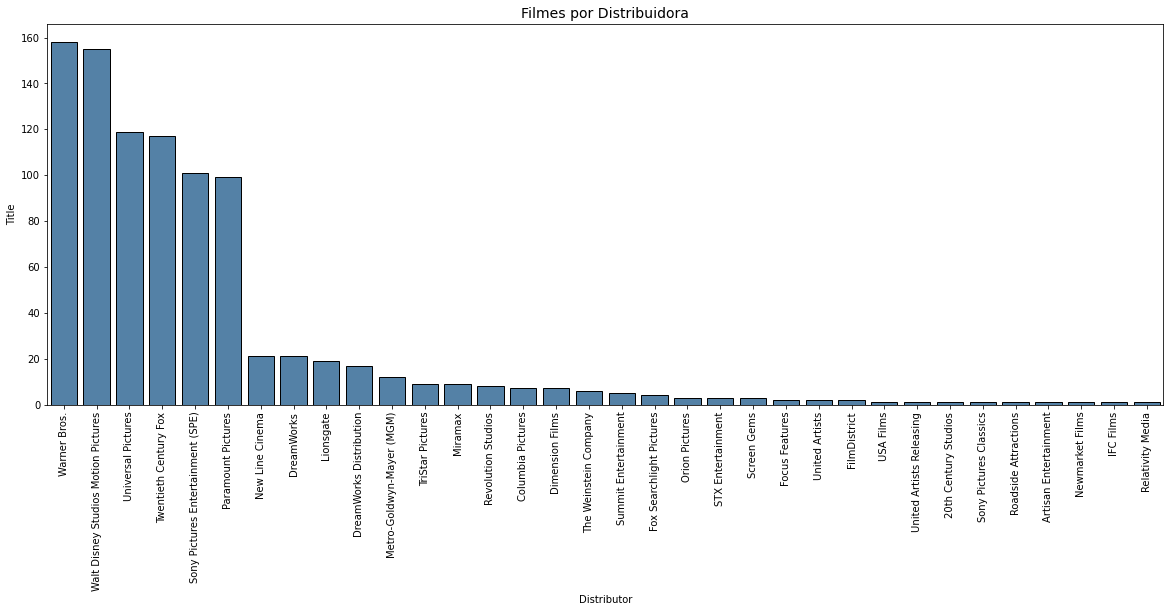

In [18]:
# vamos fazer um gráfico de barras
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(x='Distributor', y='Title', color = "steelblue", edgecolor='black',
            data= data.groupby('Distributor', as_index=False)['Title'].count().sort_values('Title',ascending=False))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Filmes por Distribuidora', fontsize=14)
plt.show()

### **Variáveis Quantitativas**

Vamos verificar a distribuição de tempo do filme.

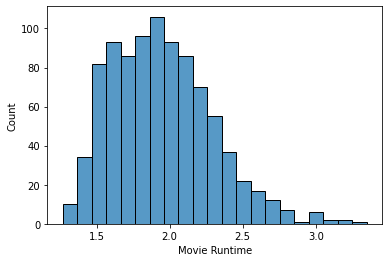

In [19]:
# com a quantidade de bins default
sns.histplot(data = data, x = "Movie Runtime")
plt.show()

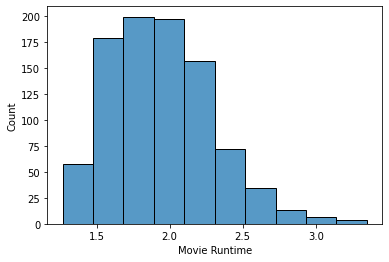

In [34]:
# com a quantidade de bins escolhida
sns.histplot(data = data, x = "Movie Runtime", bins =10)
plt.show()

## **Medidas de tendência central e Medidas separatrizes**

### **Variáveis Quantitativas**

In [21]:
# vamos verificar a "distribuição" de todas as variáveis numéricas da base de dados ao mesmo tempo
data.describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime
count,918.000000,918.000000,918.000000,918.000000
mean,167.746918,230.143436,396.866826,1.942847
std,104.036045,217.601104,308.262916,0.347929
min,80.360843,0.000260,81.600000,1.266667
25%,101.607072,88.456200,200.556355,1.666667
50%,132.135096,163.881928,301.941607,1.916667
75%,191.390485,288.557651,475.071823,2.166667
max,936.662225,2086.738578,2847.246203,3.350000


Agora iremos focar as análises nos dados de tempo de duração do filme.

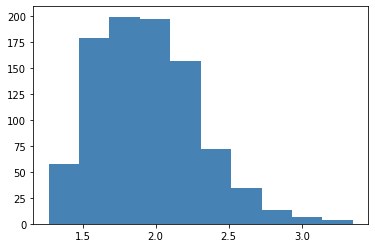

the most frequent bin:(1.6833333333333333,1.8916666666666666)
the mode:1.7875


In [22]:
# calculando a moda de variável quantitativa

# create the histogram
n, bins, patches = plt.hist(data['Movie Runtime'], bins=10, color = "steelblue")  

# show the histogram
plt.show()

mode_index = n.argmax()
# the most frequent bin
print('the most frequent bin:(' + str(bins[mode_index]) + ',' + str(bins[mode_index+1]) + ')')
# the mode         
print('the mode:'+ str((bins[mode_index] + bins[mode_index+1])/2))

In [23]:
# calculando os quantis
data["Movie Runtime"].quantile([0.05, 0.95])

0.05    1.466667
0.95    2.566667
Name: Movie Runtime, dtype: float64

Verificando graficamente o tempo de duração dos filmes.

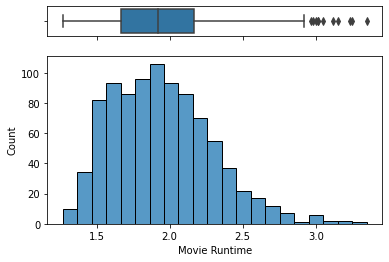

In [24]:
# creando uma figura de dois axes 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# adicionando um gráfico em cada ax 
sns.boxplot(data["Movie Runtime"], ax=ax_box)
sns.histplot(data=data, x="Movie Runtime", ax=ax_hist)
 
# removendo o nome do eixo x do boxplot
ax_box.set(xlabel='')
plt.show()

### **Variáveis Qualitativas**

In [25]:
# calculando a moda de variável qualitativa
statistics.mode(data['Distributor'])

'Warner Bros.'

### **Variáveis Quantitativas VS Variáveis Qualitativas**

Vamos verificar quanto cada distribuidora arrecadou.

In [26]:
# quanto cada distribuidora arecadou em média
data.groupby(['Distributor'])['World Sales (in $)'].mean()

Distributor
20th Century Studios                   331.503757
Artisan Entertainment                  248.639099
Columbia Pictures                      196.315661
Dimension Films                        174.715016
DreamWorks                             495.855995
DreamWorks Distribution                342.037644
FilmDistrict                           166.094760
Focus Features                         207.961405
Fox Searchlight Pictures               279.356113
IFC Films                              368.744044
Lionsgate                              394.658207
Metro-Goldwyn-Mayer (MGM)              309.823696
Miramax                                228.732351
New Line Cinema                        336.492666
Newmarket Films                        612.054506
Orion Pictures                         278.499134
Paramount Pictures                     327.712358
Relativity Media                       226.904017
Revolution Studios                     180.304510
Roadside Attractions                  

In [27]:
# quanto cada distribuidora arecadou no total
data.groupby(['Distributor'])['World Sales (in $)'].sum()

Distributor
20th Century Studios                     331.503757
Artisan Entertainment                    248.639099
Columbia Pictures                       1374.209626
Dimension Films                         1223.005113
DreamWorks                             10412.975902
DreamWorks Distribution                 5814.639953
FilmDistrict                             332.189519
Focus Features                           415.922809
Fox Searchlight Pictures                1117.424454
IFC Films                                368.744044
Lionsgate                               7498.505934
Metro-Goldwyn-Mayer (MGM)               3717.884355
Miramax                                 2058.591162
New Line Cinema                         7066.345995
Newmarket Films                          612.054506
Orion Pictures                           835.497402
Paramount Pictures                     32443.523480
Relativity Media                         226.904017
Revolution Studios                      1442.436078


## **Medidas de dispersão**

Vamos verificar as medidas de disperção para o tempo de duração dos filmes.

In [28]:
# variância
data["Movie Runtime"].var()

0.12105443402504765

In [29]:
# desvio padrão
data["Movie Runtime"].std()

0.3479287772304091

In [30]:
# desvio médio absoluto
data["Movie Runtime"].mad()

0.27727393547590895

Vamos verificar a relação entre o valor arrecadado nacionalmente e internacionalmente.

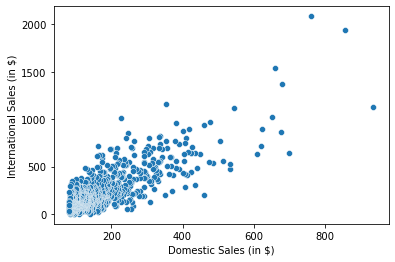

In [31]:
sns.scatterplot(data = data, x = 'Domestic Sales (in $)', y ='International Sales (in $)')
plt.show()